## Decision Tree Regression 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# step Read the Dataset
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Profit is Target 

In [3]:
# Perfom basic Data qulaity check 

df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Seperate X and Y 

In [6]:
X = df.drop(columns=['PROFIT'])
Y = df[['PROFIT']]

In [7]:
X.head()


,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Seprating cat and con Features from X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['STATE']

In [11]:
con

['RND', 'ADMIN', 'MKT']

### Performing EDA for Data 

In [12]:
df[cat].describe().T

,count,unique,top,freq
STATE,50,3,New York,17


In [13]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.800,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.180,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.085,471784.10


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

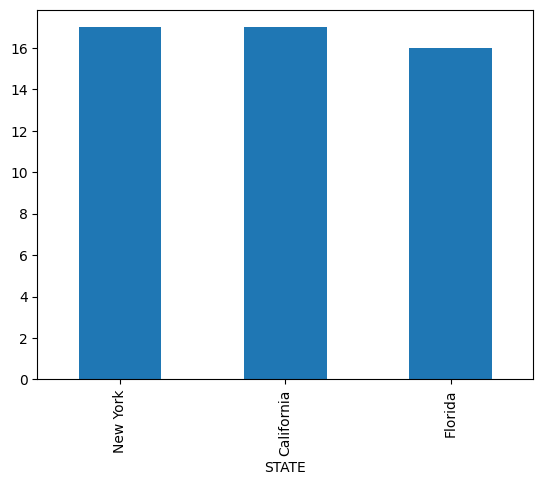

In [16]:
# for categorical Feature
df['STATE'].value_counts().plot(kind='bar')
plt.show()

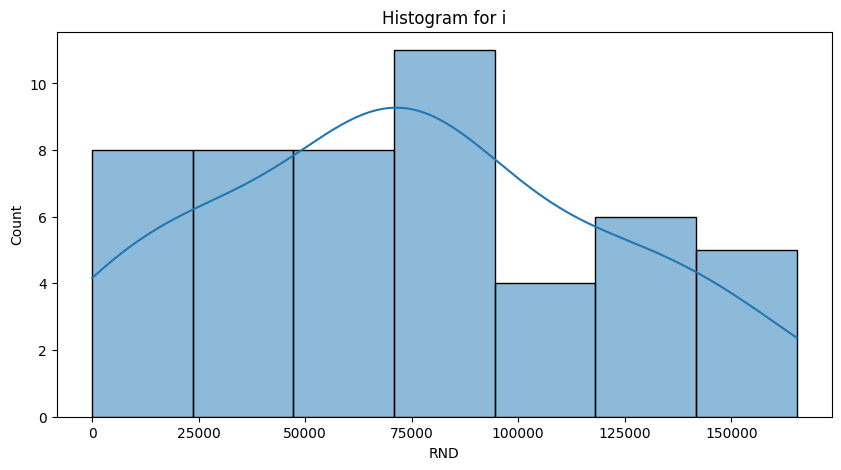

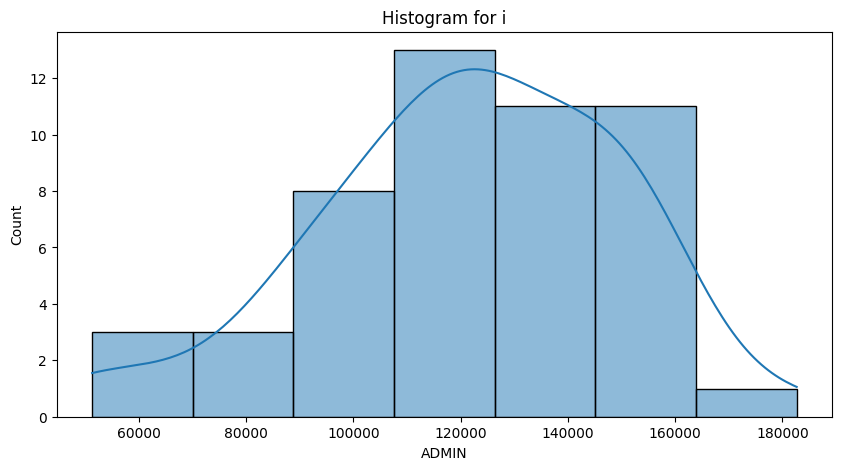

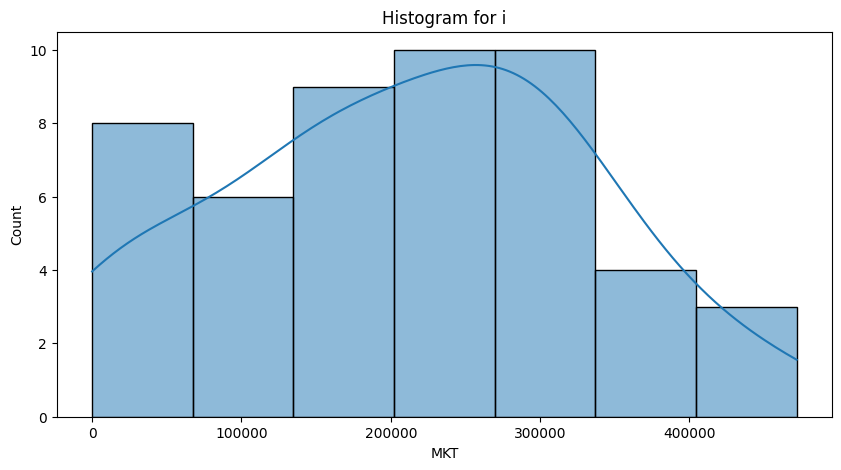

In [17]:
#  for continues features
for i in con :
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x = i,kde = True)
    plt.title(f'Histogram for {'i'}')
    plt.show()

In [18]:
# corrleation heatmap

corr = df[con].corr()
corr

,RND,ADMIN,MKT
RND,1.000000,0.241955,0.724248
ADMIN,0.241955,1.000000,-0.032154
MKT,0.724248,-0.032154,1.000000


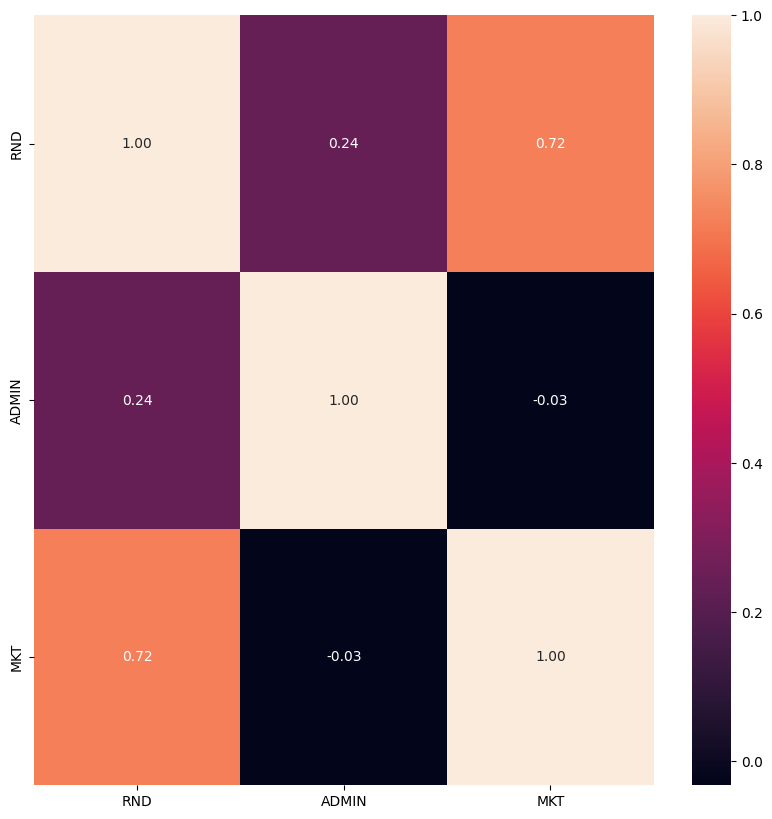

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [24]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [25]:
pre =ColumnTransformer([('con',num_pipe,con),
                        ('cat',cat_pipe,cat)])

In [26]:
pre

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['STATE'])])

In [30]:
X_pre = pre.fit_transform(X)


In [34]:
# perform train test split 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [35]:
xtrain.shape

(40, 6)

In [36]:
xtest.shape

(10, 6)

In [37]:
ytrain.shape

(40, 1)

In [38]:
ytest.shape

(10, 1)

## Build a Decision tree Regression model 

In [42]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion='absolute_error')
model.fit (xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [43]:
model.score(xtrain,ytrain)


0.6019636534994364

In [44]:
model.score(xtest,ytest)

0.5746278420052591

### Hyperparemeter Tuning

In [47]:
params={'max_depth':[2,3,4,5,6,7,8,9,10],
         'min_samples_split':[3,4,5,6,7,8],
         'min_samples_leaf':[3,4,5,6,7,8],
         'criterion':['squared_error','absolute_error']}

In [48]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [49]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [50]:
gscv.best_score_

-287275525.60288435

In [51]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=4)

In [52]:
# Evaluate tuned model
best_dtr.score(xtrain,ytrain)

0.964491148172637

In [53]:
best_dtr.score(xtest,ytest)

0.9397388817493316

### Predict Train and test Results 

In [54]:
ypred_train = best_dtr.predict(xtrain)
ypred_test = best_dtr.predict(xtest)

In [55]:
ypred_train[0:5]

array([ 96778.92, 111313.02, 111313.02, 141585.52, 105008.31])

In [56]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [57]:
ypred_test[0:5]

array([156122.51,  78019.37,  78019.37, 105008.31, 156122.51])

In [58]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


### Predict out of sample data

In [59]:
xnew = pd.read_csv('outsample.csv')
xnew

,RND,ADMIN,MKT,STATE
0,50000,60000,55000,California
1,100000,50000,30000,New York
2,150000,70000,65000,Florida
3,130000,43000,15000,California


In [60]:
xnew_pre = pre.transform(xnew)


In [64]:
xnew_pre

array([[-0.52203208, -2.21171675, -1.28881142,  1.        ,  0.        ,
         0.        ],
       [ 0.57829786, -2.57225629, -1.49531849,  0.        ,  0.        ,
         1.        ],
       [ 1.67862781, -1.85117722, -1.2062086 ,  0.        ,  1.        ,
         0.        ],
       [ 1.23849583, -2.82463396, -1.61922273,  1.        ,  0.        ,
         0.        ]])

In [65]:
preds = best_dtr.predict(xnew_pre)
preds

array([ 96778.92, 141585.52, 156122.51, 156122.51])

In [66]:
xnew['profit_pred']=preds

In [67]:
xnew

,RND,ADMIN,MKT,STATE,profit_pred
0,50000,60000,55000,California,96778.92
1,100000,50000,30000,New York,141585.52
2,150000,70000,65000,Florida,156122.51
3,130000,43000,15000,California,156122.51


In [68]:
xnew.to_csv('Results.csv',index=False)

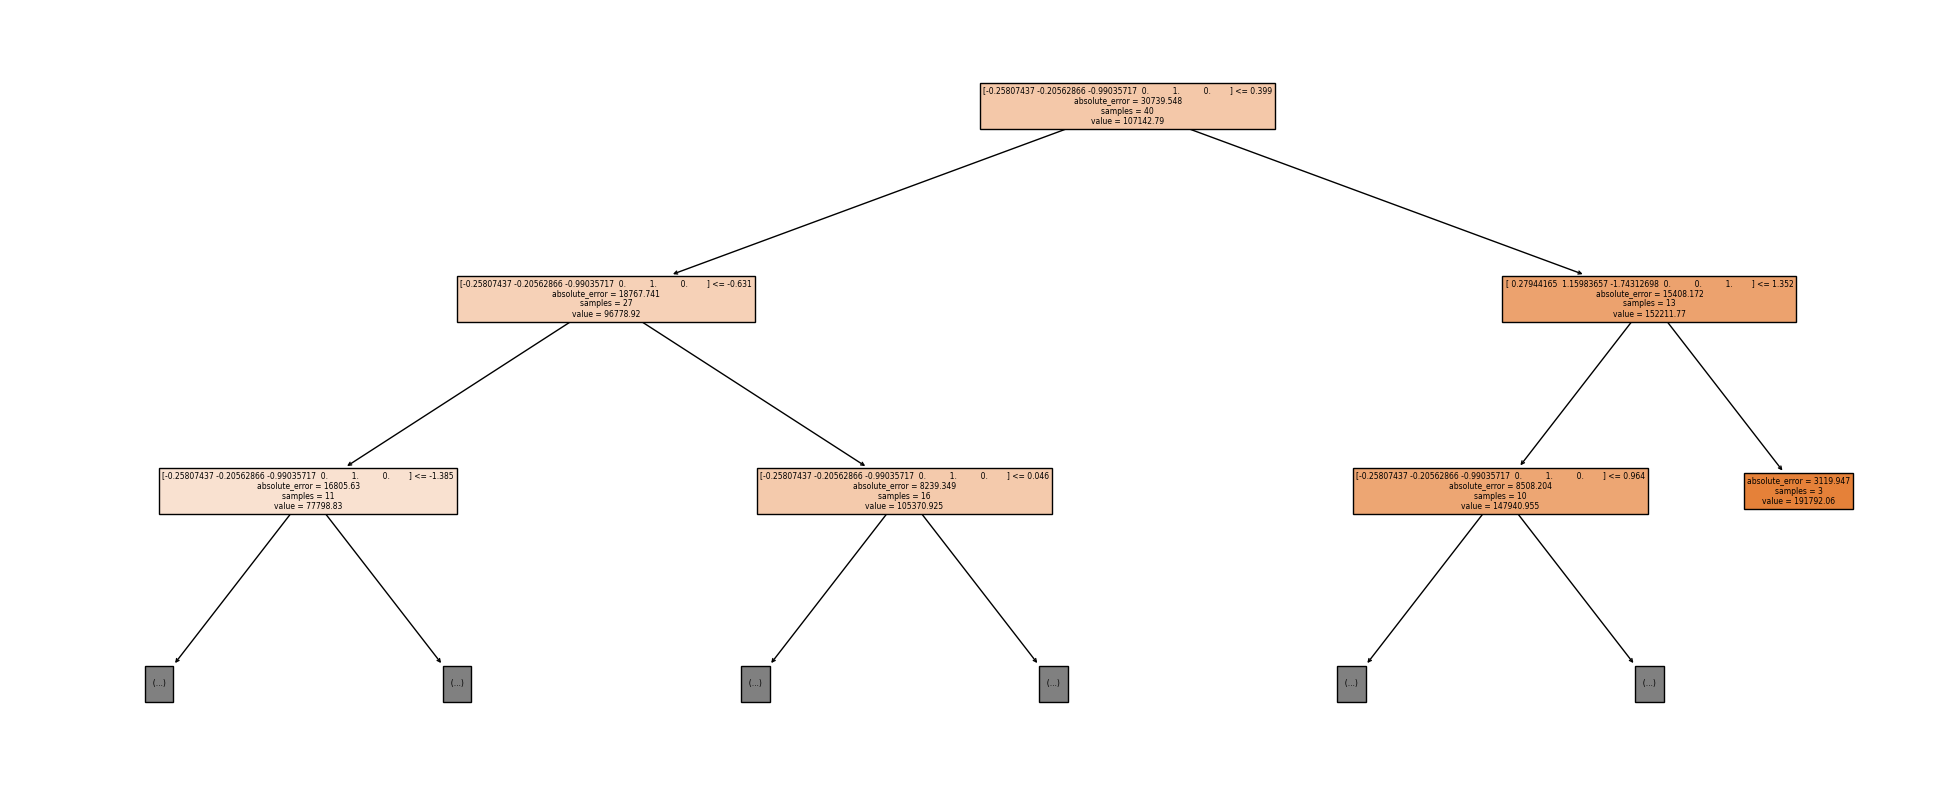

In [81]:
# plot the regression tree 

import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10
                    ))
plot_tree(best_dtr,max_depth=2,feature_names=xtrain,filled=True)
plt.show()